In [12]:
# Always reload modules before executing code.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import itertools
import json
import math
import os
import time

import cv2
from matplotlib import pyplot as plt
import numpy as np

from vp import draw_tools
from vp import scoring
from vp import vp_finder
import helpers
import toulouse
import york_urban

In [14]:
# Load York Urban dataset.
YORK_URBAN_DATASET_FOLDER = '../YorkUrbanDB'
york_urban_dataset_path = os.path.abspath(os.path.join(os.getcwd(), YORK_URBAN_DATASET_FOLDER))
print('Loading dataset at %s.' % york_urban_dataset_path)
york_urban_dataset = york_urban.load_dataset(york_urban_dataset_path)#.with_mask(set(range(5)))
print('\nLoaded %s images from dataset.' % len(york_urban_dataset.image_paths))

Loading dataset at /vagrant/YorkUrbanDB.
.........................................................................................................

Loaded 102 images from dataset.


In [15]:
# Run vanishing point detection and calculate error.
main_results_yud = helpers.batch_detect_vps_and_score(
    york_urban_dataset,
    vp_finder.find_vanishing_points_in_image)

......................................................................................................


Horizon detection error is the pixel distance between the detected and actual horizon, divided by the image height.


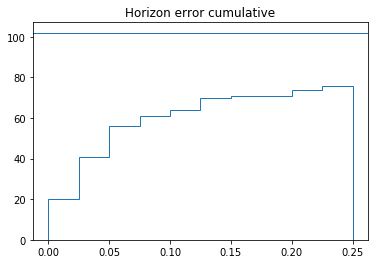

	Median: 0.07.
	74.51% of results were within a quarter-image distance of the actual horizon.

This shows the horizon error if we always guessed a flat, image-center horizon, i.e., no algorithm at all.


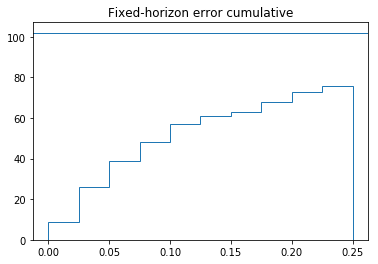

	Median: 0.11.
	74.51% of the images had a horizon closer to the center of the image than the edges.

VP direction error is the difference in angle from image center to the actual and detected VPs.


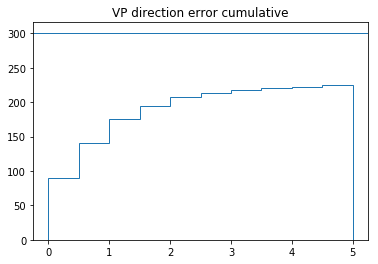

	Median: 1.10.
	74.75% of GT VPs were detected within 5 degrees, or 78.40% if we omit the 4.65% of GT VPs that were completely undetected.


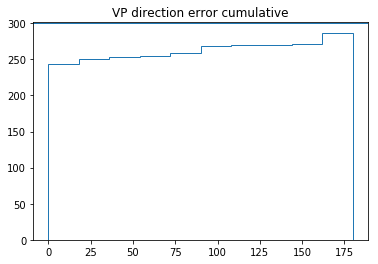

	Median: 1.10.


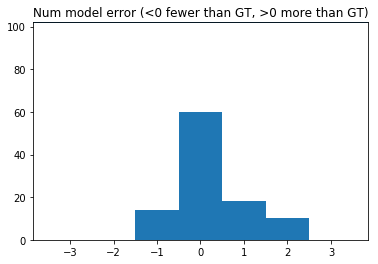

	Median: 0.00. Max: 2.00


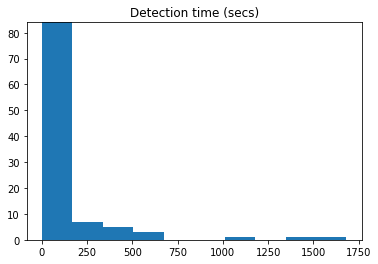

	Median: 44.94. Max: 1681.60


In [16]:
helpers.show_results_summary(york_urban_dataset, main_results_yud)

Left side is ground truth, right side is detection results.


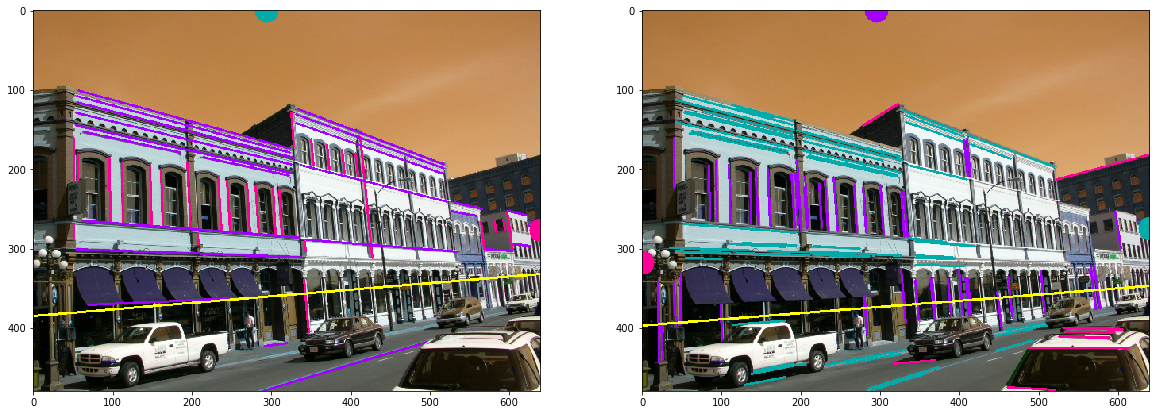

Horizon error: 0.03034220618366407. VP angle error (degrees): 0.20, 0.44. Line counts: [50, 8, 42]


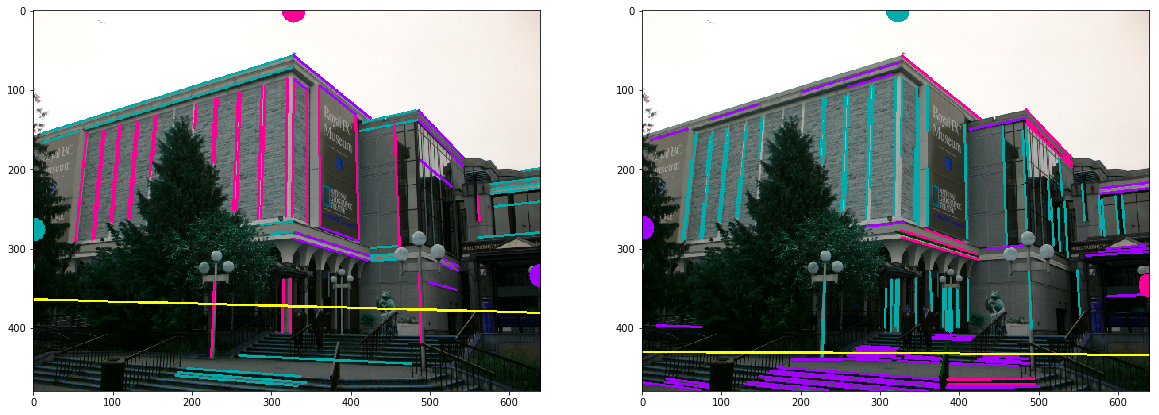

Horizon error: 0.1365559858401569. VP angle error (degrees): 0.25, 1.09, 2.31. Line counts: [55, 9, 46]


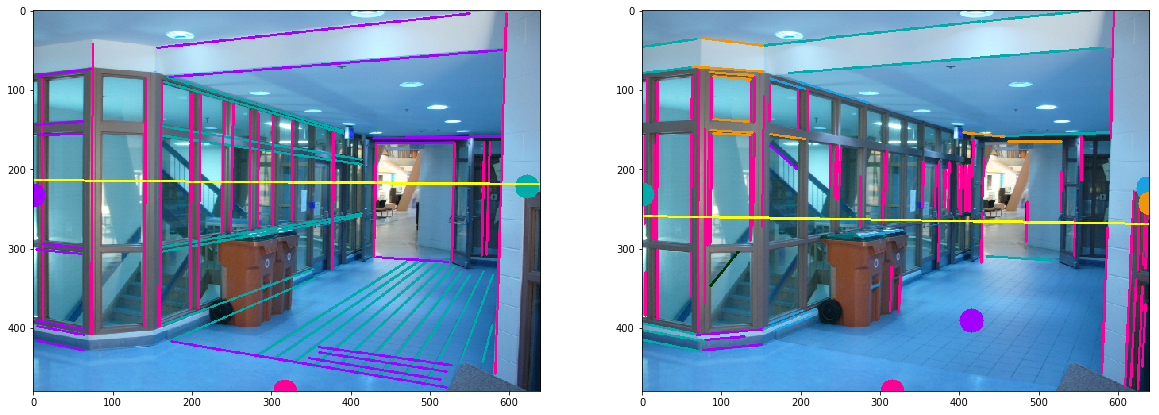

Horizon error: 0.10390852585004678. VP angle error (degrees): 0.47, 0.40, 0.30. Line counts: [12, 58, 4, 6, 10]


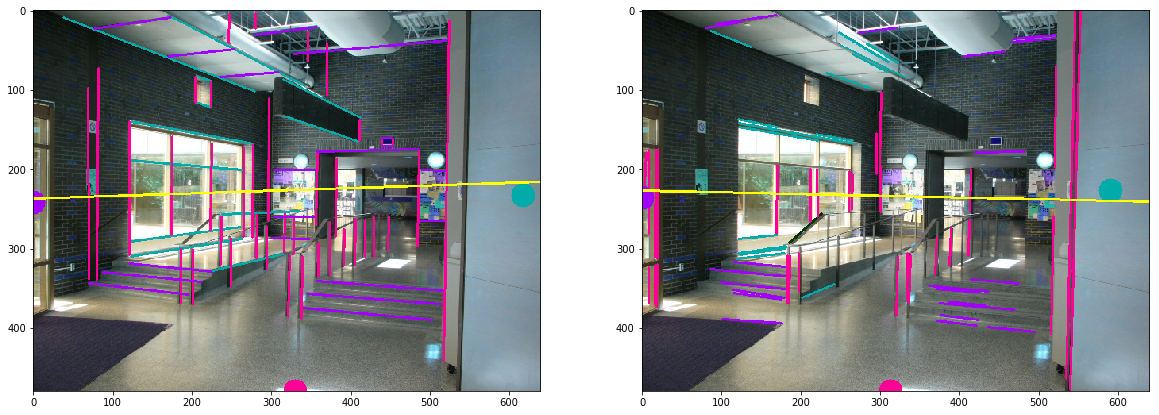

Horizon error: 0.052942918995373255. VP angle error (degrees): 1.27, 3.16, 1.44. Line counts: [15, 31, 21]


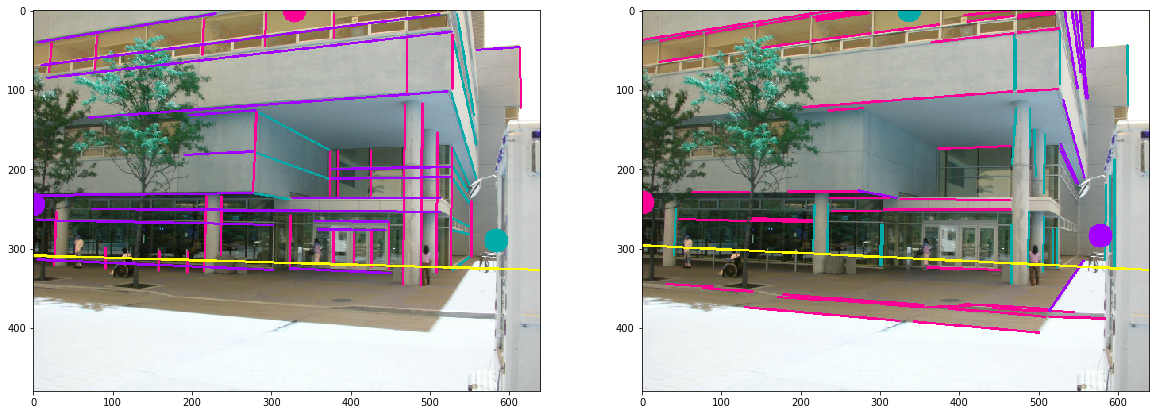

Horizon error: 0.027710664449837687. VP angle error (degrees): 1.07, 1.19, 0.44. Line counts: [21, 45, 10]


In [17]:
# Visualize a sample of results.
SAMPLE_INDICES = range(len(york_urban_dataset.image_paths))[:5]
helpers.visualize_vp_detection_results(
    york_urban_dataset, main_results_yud, mask_indices=SAMPLE_INDICES)

## Other methods and examples

In [18]:
# X-RANSAC: Run vanishing point detection and calculate error.
x_ransac_results = helpers.batch_detect_vps_and_score(
    york_urban_dataset,
    lambda img: vp_finder.find_vanishing_points_in_image(
        img,
        line_detection_options=vp_finder.LineDetectionOptions(),
        ransac_options=vp_finder.RansacOptions(
            min_inliers=1, inlier_threshold=4, desired_success_rate=0.95),
        x_ransac_options=vp_finder.XRansacOptions()))

......................................................................................................


Horizon detection error is the pixel distance between the detected and actual horizon, divided by the image height.


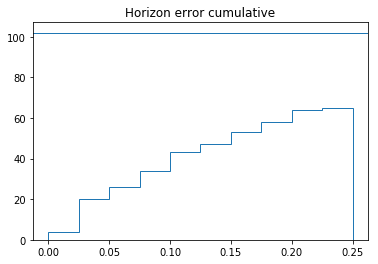

	Median: 0.17.
	63.73% of results were within a quarter-image distance of the actual horizon.

This shows the horizon error if we always guessed a flat, image-center horizon, i.e., no algorithm at all.


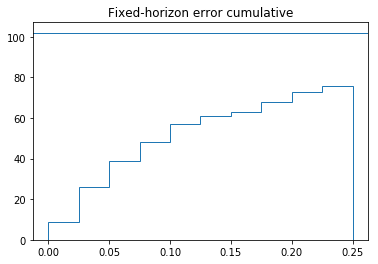

	Median: 0.11.
	74.51% of the images had a horizon closer to the center of the image than the edges.

VP direction error is the difference in angle from image center to the actual and detected VPs.


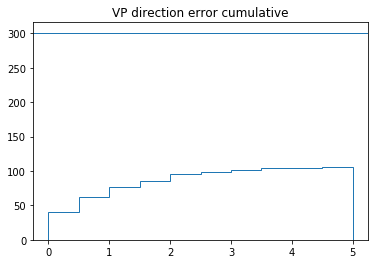

	Median: 34.18.
	35.22% of GT VPs were detected within 5 degrees, or 50.00% if we omit the 29.57% of GT VPs that were completely undetected.


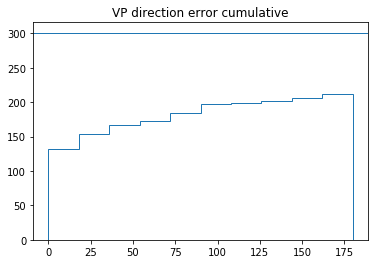

	Median: 34.18.


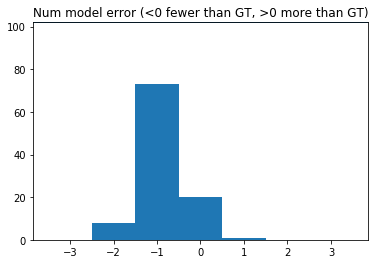

	Median: -1.00. Max: 1.00


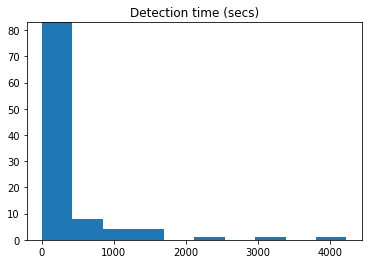

	Median: 119.42. Max: 4230.42


In [19]:
helpers.show_results_summary(york_urban_dataset, x_ransac_results)

Left side is ground truth, right side is detection results.


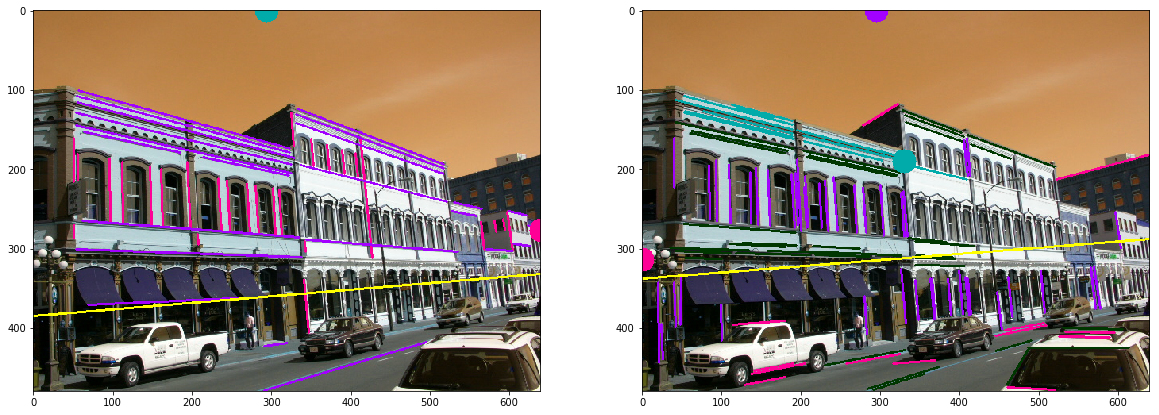

Horizon error: 0.0980423268673602. VP angle error (degrees): 0.20, 86.92. Line counts: [17, 13, 42]


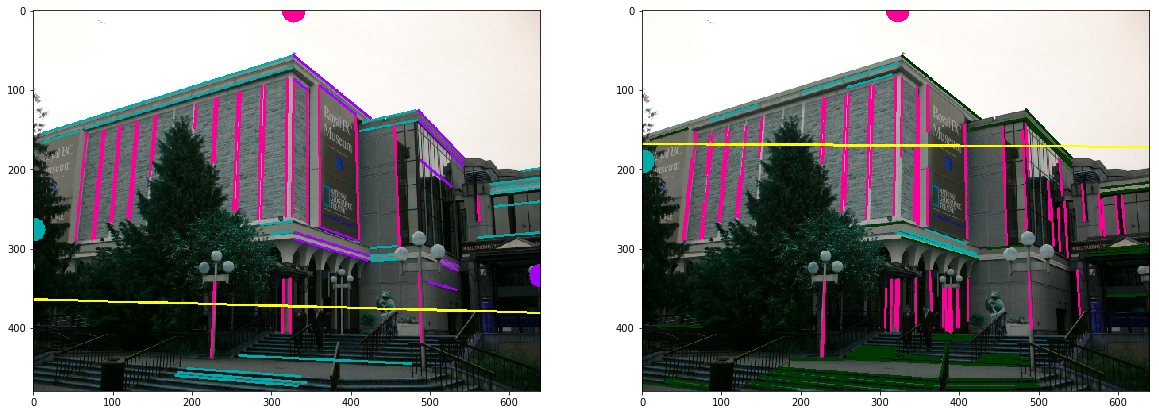

Horizon error: 0.43435172563956065. VP angle error (degrees): 20.36, 1.09, NA. Line counts: [7, 55]


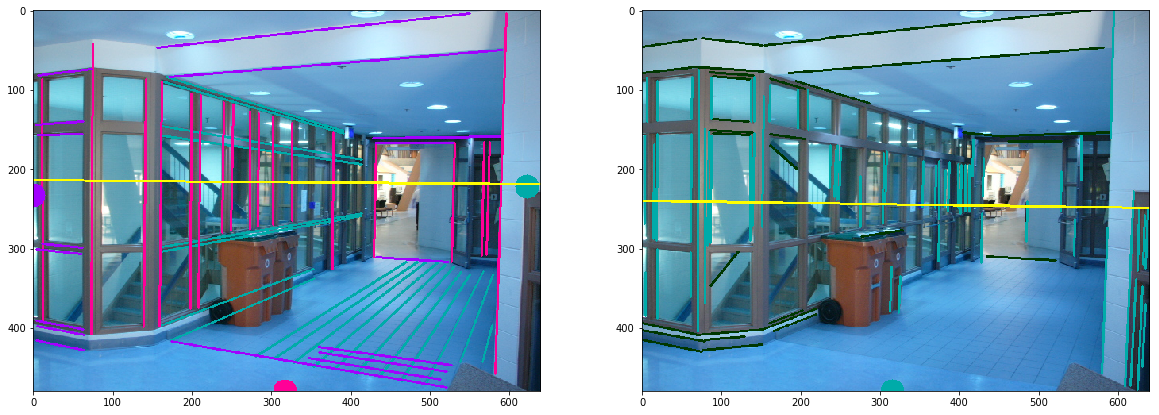

Horizon error: 0.06240030197169002. VP angle error (degrees): NA, 0.40, NA. Line counts: [58]


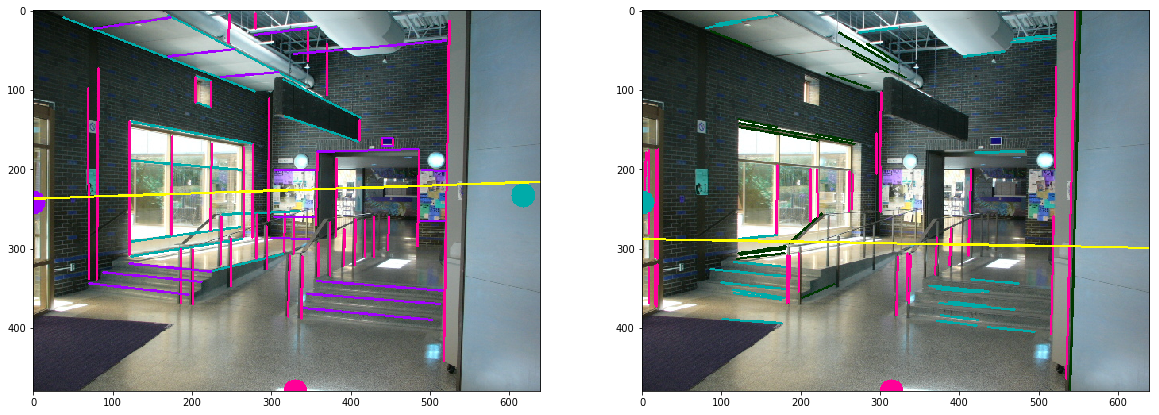

Horizon error: 0.17403420520987697. VP angle error (degrees): NA, 2.90, 0.05. Line counts: [22, 30]


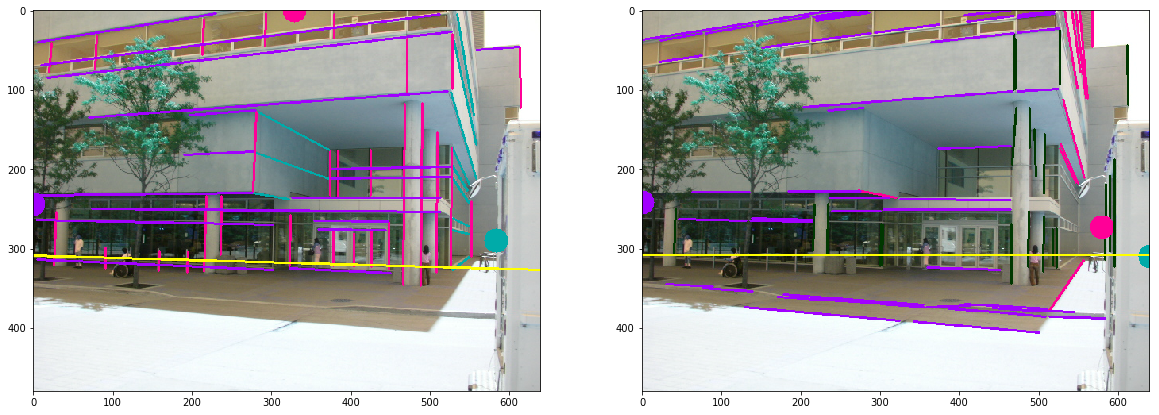

Horizon error: 0.04138757784983452. VP angle error (degrees): 3.44, 104.64, 0.44. Line counts: [12, 14, 45]


In [20]:
# Visualize a sample of results.
SAMPLE_INDICES = range(len(york_urban_dataset.image_paths))[:5]
helpers.visualize_vp_detection_results(
    york_urban_dataset, x_ransac_results, mask_indices=SAMPLE_INDICES)

In [21]:
# Load Toulouse dataset.
# This higher res dataset tends to be slower and a bit more challenging.
"""
TOULOUSE_DATASET_FOLDER = '../toulouse_dataset/tvpd_dataset'
toulouse_dataset_path = os.path.abspath(os.path.join(os.getcwd(), TOULOUSE_DATASET_FOLDER))
print('Loading dataset at %s.' % toulouse_dataset_path)
toulouse_dataset = toulouse.load_dataset(toulouse_dataset_path)
print('\nLoaded %s images from dataset.' % len(toulouse_dataset.image_paths))
"""

"\nTOULOUSE_DATASET_FOLDER = '../toulouse_dataset/tvpd_dataset'\ntoulouse_dataset_path = os.path.abspath(os.path.join(os.getcwd(), TOULOUSE_DATASET_FOLDER))\nprint('Loading dataset at %s.' % toulouse_dataset_path)\ntoulouse_dataset = toulouse.load_dataset(toulouse_dataset_path)\nprint('\nLoaded %s images from dataset.' % len(toulouse_dataset.image_paths))\n"

In [22]:
# Visualize LSD line detector results.
"""
from vp import line_detector
im = cv2.imread(york_urban_dataset.image_paths[2])
wim = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
lines = line_detector.lsd_lines(wim, min_line_length=.055)
print(len(lines))
draw_tools.draw_lines(lines, im)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.imshow(im)
plt.show()
"""

'\nfrom vp import line_detector\nim = cv2.imread(york_urban_dataset.image_paths[2])\nwim = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)\nlines = line_detector.lsd_lines(wim, min_line_length=.055)\nprint(len(lines))\ndraw_tools.draw_lines(lines, im)\nfig, ax = plt.subplots(1, 1, figsize=(20, 20))\nax.imshow(im)\nplt.show()\n'